# Proyecto Sprint 8 
# Chicago Weather Analysis

## Paso 1: Importación de Librerías

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import psycopg2
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
from io import StringIO


# Cargar credenciales desde archivo JSON

In [2]:
with open("credentials.json", "r") as file:
    creds = json.load(file)

## Paso 2: Extracción de Datos desde la Web

In [3]:
url = "https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html"

# Obtener el contenido de la página
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extraer la tabla con el ID especificado
table = soup.find("table", attrs={"id": "weather_records"})

# Convertir la tabla HTML en un DataFrame
df = pd.read_html(StringIO(str(table)))[0]

# Nombrar el DataFrame como weather_records
weather_records = df



In [4]:
weather_records.head(10)

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.15,broken clouds
1,2017-11-01 01:00:00,275.70,scattered clouds
2,2017-11-01 02:00:00,275.61,overcast clouds
3,2017-11-01 03:00:00,275.35,broken clouds
4,2017-11-01 04:00:00,275.24,broken clouds
5,2017-11-01 05:00:00,275.05,overcast clouds
6,2017-11-01 06:00:00,275.14,overcast clouds
7,2017-11-01 07:00:00,275.23,overcast clouds
8,2017-11-01 08:00:00,275.23,overcast clouds
9,2017-11-01 09:00:00,275.32,overcast clouds



## Paso 3: Carga de Datos desde Archivos CSV

In [5]:
# Importar archivos CSV
taxi_data = pd.read_csv("/Users/juanvielmapereyra/NOTEBOOKS/Project_Taxi_sp8/csv/moved_project_sql_result_01.csv")
neighborhood_data = pd.read_csv("//Users/juanvielmapereyra/NOTEBOOKS/Project_Taxi_sp8/csv/moved_project_sql_result_04.csv")
trip_data = pd.read_csv("/Users/juanvielmapereyra/NOTEBOOKS/Project_Taxi_sp8/csv/moved_project_sql_result_07.csv")


## Paso 4: Análisis Exploratorio de Datos

In [6]:
taxi_data.info()
neighborhood_data.info()
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_se

### Identificar los 10 principales barrios por número de finalizaciones

In [7]:
top_neighborhoods = neighborhood_data.sort_values(by="average_trips", ascending=False).head(10)

### Graficar empresas de taxis y número de viajes

<Figure size 1400x600 with 0 Axes>

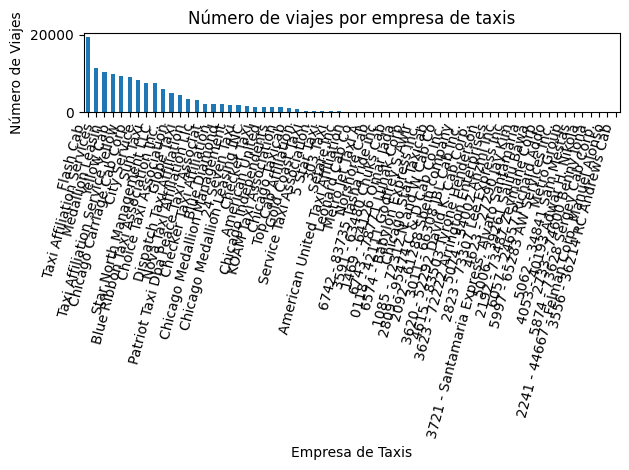

In [8]:
plt.figure(figsize=(14, 6))  # Ajusta el tamaño de la figura
taxi_data.plot(kind="bar", x="company_name", y="trips_amount", title="Número de viajes por empresa de taxis", legend=False)
plt.xticks(rotation=75, ha="right")  # Rotar etiquetas del eje X para mejor visualización
plt.xlabel("Empresa de Taxis")
plt.ylabel("Número de Viajes")
plt.tight_layout()  # Ajusta los elementos de la gráfica para evitar sobreposiciones
plt.show()

### Graficar los 10 principales barrios por número de finalizaciones

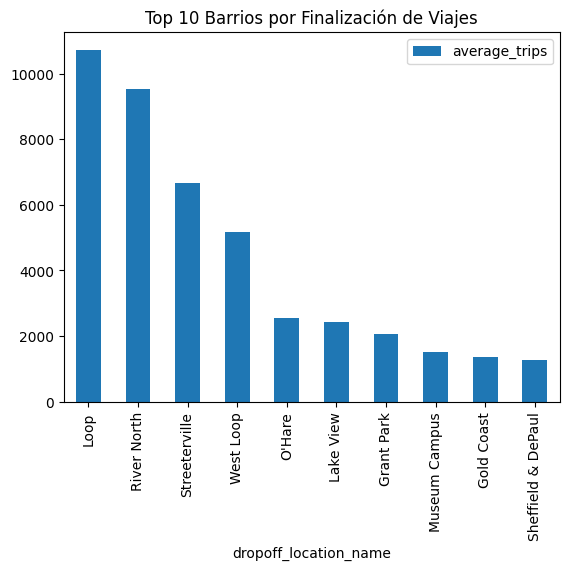

In [9]:
top_neighborhoods.plot(kind="bar", x="dropoff_location_name", y="average_trips", title="Top 10 Barrios por Finalización de Viajes")
plt.show()

## Paso 5: Prueba de Hipótesis

**Hipótesis:**

- **H0:** La duración promedio de los viajes en sábados lluviosos es igual a la de otros sábados.
- **H1:** La duración promedio de los viajes en sábados lluviosos es diferente a la de otros sábados.

# Filtrar datos según condiciones climáticas

In [10]:
duration_rainy = trip_data[trip_data["weather_conditions"] == "Bad"]["duration_seconds"]
duration_non_rainy = trip_data[trip_data["weather_conditions"] == "Good"]["duration_seconds"]

# Nivel de significación
alpha = 0.05

# Prueba t de dos muestras independientes
stat, p_value = stats.ttest_ind(duration_rainy, duration_non_rainy, equal_var=False)

print(f"Estadístico de prueba: {stat}, Valor p: {p_value}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio de los viajes cambia en sábados lluviosos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que la duración cambia en sábados lluviosos.")


Estadístico de prueba: 7.186034288068629, Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula: la duración promedio de los viajes cambia en sábados lluviosos.
